In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
raw_data = RawData.from_folder (
    basepath    = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/train',
    source_dirs = ['images'],
    target_dir  = 'masks',
    axes        = 'YX',
)
print(raw_data.shape)

In [10]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (64,64),
    n_patches_per_image = 1024,
    save_file           = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/UnetSegmentation.npz',
)

  447 raw images x    1 transformations   =   447 images
  447 images     x 1024 patches per image = 457728 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/StarDistTraining/train: target='masks', sources=['images'], axes='YX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 447/447 [00:41<00:00, 10.89it/s]


Saving data to /data/u934/service_imagerie/v_kapoor/StarDistTraining/UnetSegmentation.npz.


In [11]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (457728, 1, 64, 64)
axes  of X,Y = SCYX


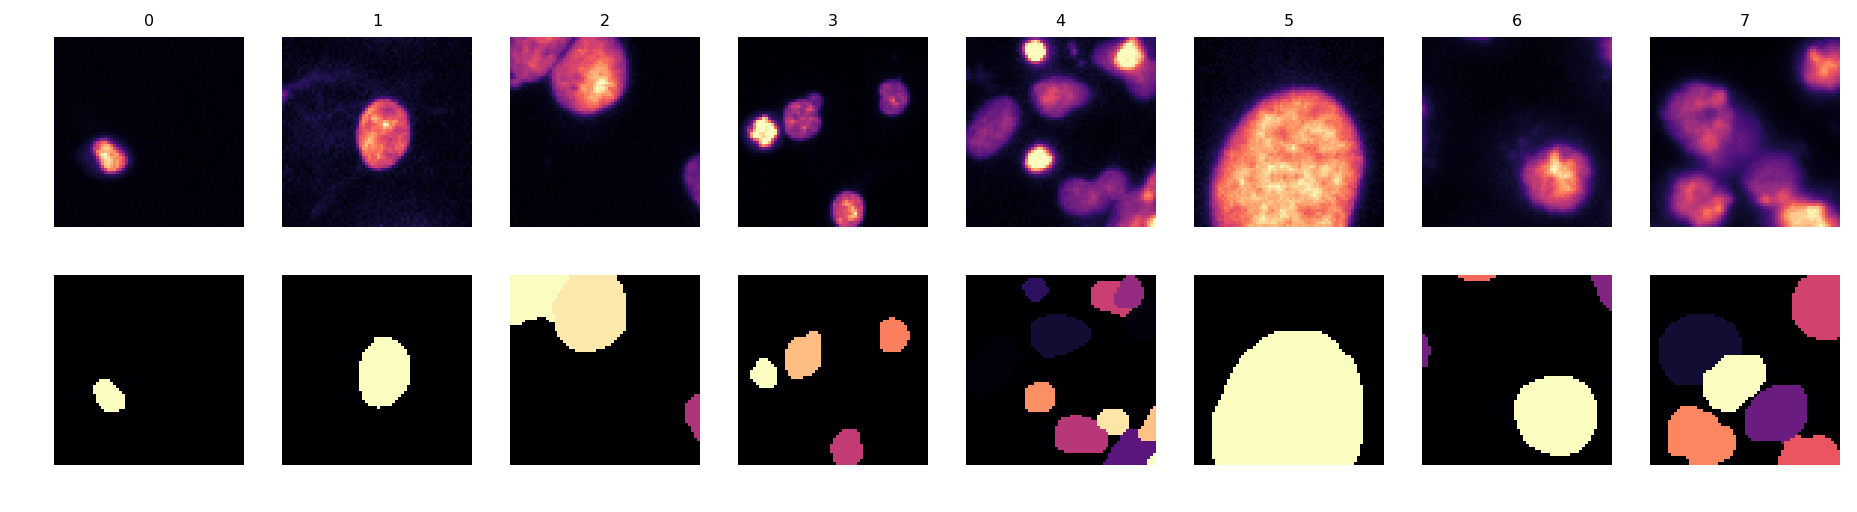

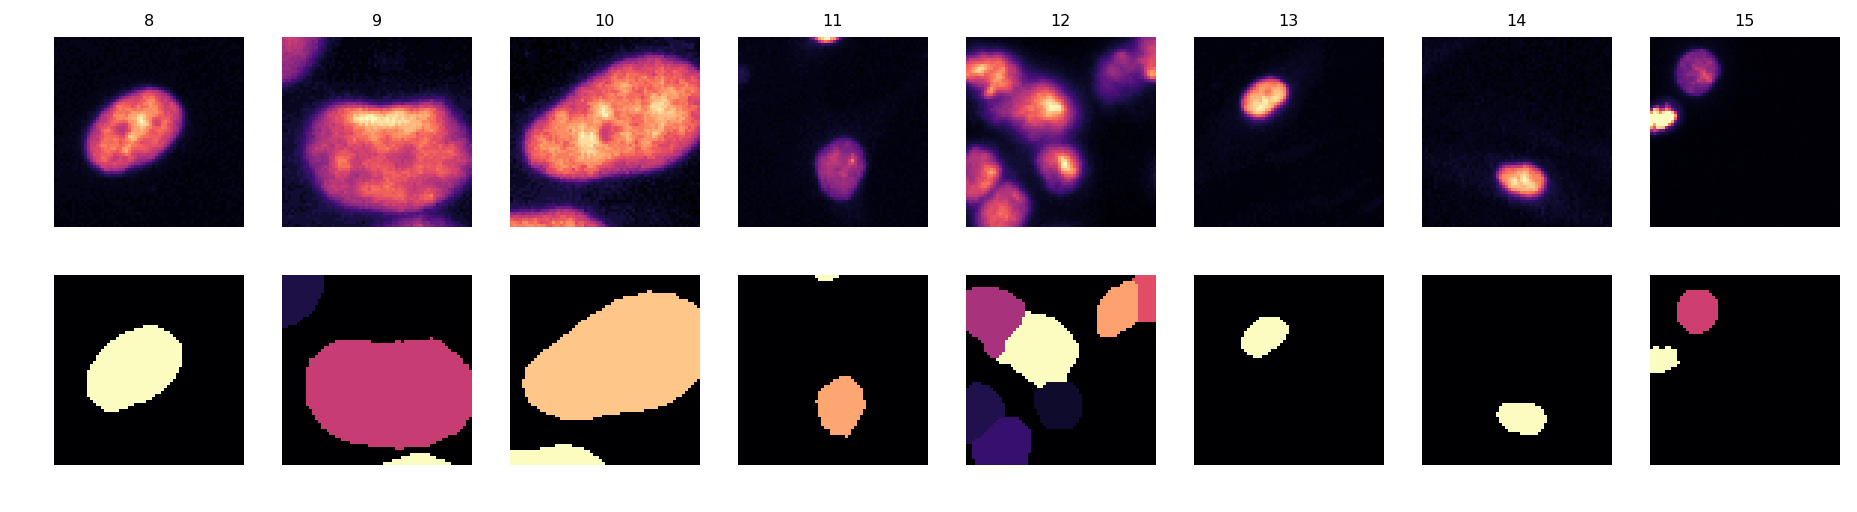

In [21]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;